## Load Dependencies

In [31]:
# load dependencies
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

# dependency for handling warnings
import warnings
warnings.filterwarnings('ignore')

In [32]:
# read the AirPassengers dataset
airlines_data = pd.read_csv(r'AirPassengers.csv', index_col='Month', parse_dates=True)

# check first few rows of airlines data
airlines_data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Check Different Time Series Components using ETS Decomposition

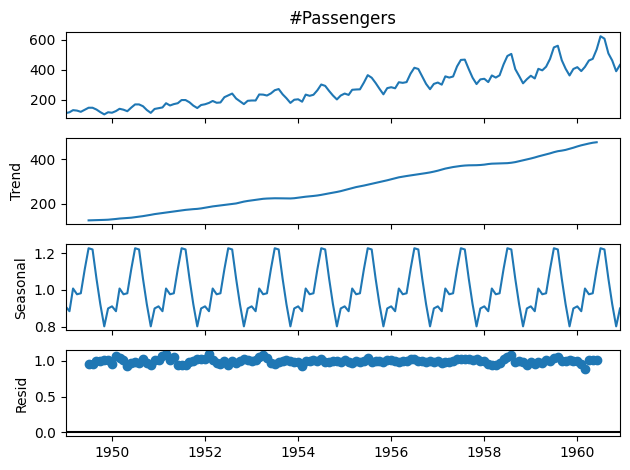

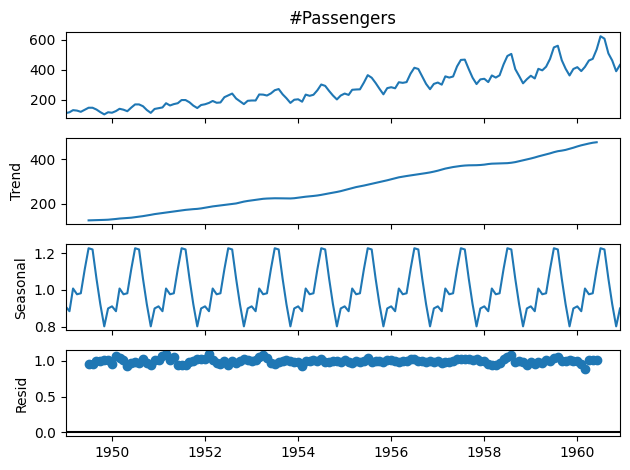

In [33]:
# check different components of airlines data using ETS Decomposition
result = seasonal_decompose(airlines_data['#Passengers'], 
                            model ='multiplicative')

# ETS plot 
result.plot()

## Parameter Analaysis For the ARIMA Model

In [34]:
# import the dependecy for Parameter Analysis
from pmdarima import auto_arima
  
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
  
# fit auto_arima function to airlines dataset
stepwise_fit = auto_arima(airlines_data['#Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # don't want to know if an order does not work
                          suppress_warnings = True,  # don't want convergence warnings
                          stepwise = True)           # set stepwise
  
# print the summary of the model
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.32 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.41 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.33 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.31 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.18 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.37 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.46 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.31 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.10 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.47 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Fri, 26 May 2023   AIC                           1019.178
Time:                                     20:35:23   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Split Data in Train and Test Set

In [35]:
# Split data into train and test sets
train = airlines_data.iloc[:len(airlines_data)-12]
test = airlines_data.iloc[len(airlines_data)-12:] # set one year(12 months) for testing

## Fit ARIMA Model to AirPassengers dataset

In [36]:
# Fit a SARIMAX(0, 1, 1)x(2, 1, 0, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['#Passengers'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 0, 12))
  
result = model.fit()
result.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.38831D+00    |proj g|=  4.70990D-02

At iterate    5    f=  3.38511D+00    |proj g|=  5.31082D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     12      1     0     0   6.332D-07   3.385D+00
  F =   3.3850725051034445     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -446.830
Date:                             Fri, 26 May 2023   AIC                            901.659
Time:                                     20:35:34   BIC                            912.776
Sample:                                 01-01-1949   HQIC                           906.173
                                      - 12-01-1959                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2556      0.080     -3.190      0.001      -0.413      -0.099
ar.S.L12      -0.0962      0.090     -1.073      0.283      -0.272       0.080
ar.S.L24       0.1454      0.101      1.445      0.149      -0.052       0.343
sigma2       106.2407     15.243      6.970      0.000      76.364     136.117
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.86   Prob(JB):                         0.99
Heteroskedasticity (H):               1.63   Skew:                             0.01
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Make Predictions for Test Set using ARIMA Model

<Axes: xlabel='Month'>

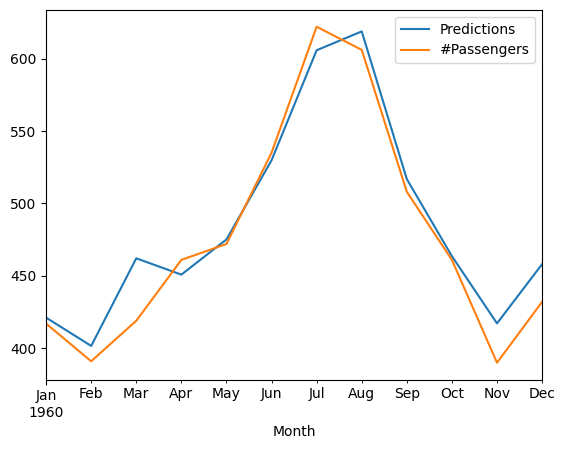

In [37]:
start = len(train)
end = len(train) + len(test) - 1
  
# make predictions for one year for the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# comapre predictions and actual values
predictions.plot(legend = True)
test['#Passengers'].plot(legend = True)

## Evaluate the ARIMA model using MSE and RMSE

In [43]:
# Load evaluation metrics
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# calculate root mean squared error
print("RMSE: ", rmse(test["#Passengers"], predictions))
  
# calculate mean squared error
print("MSE: ", mean_squared_error(test["#Passengers"], predictions))

RMSE:  18.380777778646006
MSE:  337.8529917479668


## Forecast the Airlines Data using ARIMA Model

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51881D+00    |proj g|=  8.79689D-02

At iterate    5    f=  3.50915D+00    |proj g|=  1.43787D-02


 This problem is unconstrained.



At iterate   10    f=  3.49212D+00    |proj g|=  1.26964D-02

At iterate   15    f=  3.48681D+00    |proj g|=  2.54137D-03

At iterate   20    f=  3.48603D+00    |proj g|=  2.74314D-03

At iterate   25    f=  3.48587D+00    |proj g|=  8.04444D-04

At iterate   30    f=  3.48583D+00    |proj g|=  2.29838D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     48      1     0     0   3.043D-04   3.486D+00
  F =   3.4858236834138685     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<Axes: xlabel='Month'>

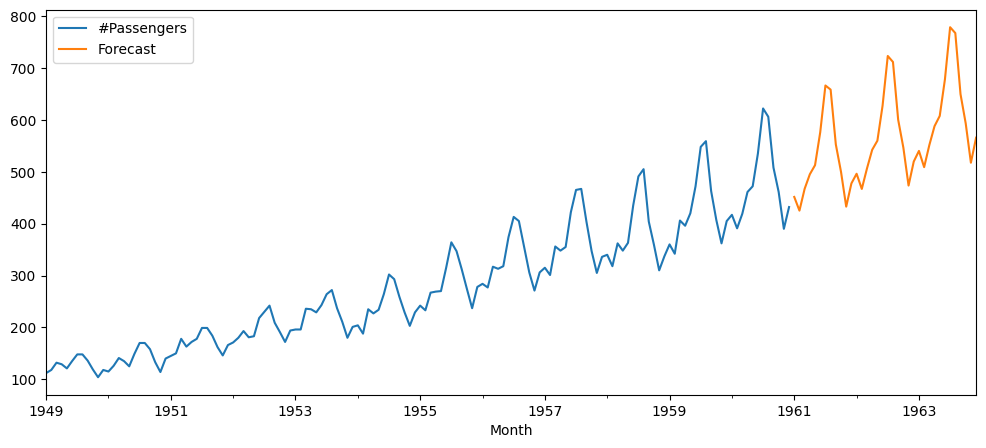

In [39]:
# train the ARIMA model on the entire dataset
# create an object of the SARIMAX model 
model = SARIMAX(airlines_data['#Passengers'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
# fit the model
result = model.fit()
  
# forecast for the next 3 years
forecast = result.predict(start = len(airlines_data), 
                          end = (len(airlines_data)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
# plot the forecast values
airlines_data['#Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)